# Metal Surface Defects

### 1. Import Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

### 2. Load Data

In [2]:
# Path to the 'train' directory where images are stored
train_dir = 'metal_surface_defects/NEU Metal Surface Defects Data/train'

# Initialize lists to hold image data and labels
image_data = []
labels = []

# Function to load and label images
def load_image_data(train_dir):
    for defect_type in os.listdir(train_dir):
        defect_folder = os.path.join(train_dir, defect_type)
        
        if os.path.isdir(defect_folder):  # Check if it's a folder (defect type)
            for file_name in os.listdir(defect_folder):
                if file_name.endswith('.bmp'):  # Assuming BMP files are used
                    # Load the image
                    img = cv2.imread(os.path.join(defect_folder, file_name))
                    img = cv2.resize(img, (224, 224))  # Resize to consistent dimensions
                    
                    # Ensure the image has the shape (224, 224, 3)
                    img = np.squeeze(img)  # Remove extra dimension if needed

                    # Check the shape after processing
                    print(f"Image shape after processing: {img.shape}")
                    
                    image_data.append(img)
                    
                    # The folder name is the label (defect type)
                    labels.append(defect_type)
    
    return np.array(image_data), labels

# Load the image data and labels
X_data, y_labels = load_image_data(train_dir)

Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (224, 224, 3)
Image shape after processing: (2

### 3. PreProcess Data

In [5]:
# Normalize image data (pixel values to [0, 1])
X_data = X_data / 255.0

# Encode the labels (defect types) as numeric values
label_encoder = LabelEncoder()
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels_encoded, test_size=0.2, random_state=42)

# Print the shape of the resulting data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (1324, 224, 224, 3)
Test data shape: (332, 224, 224, 3)


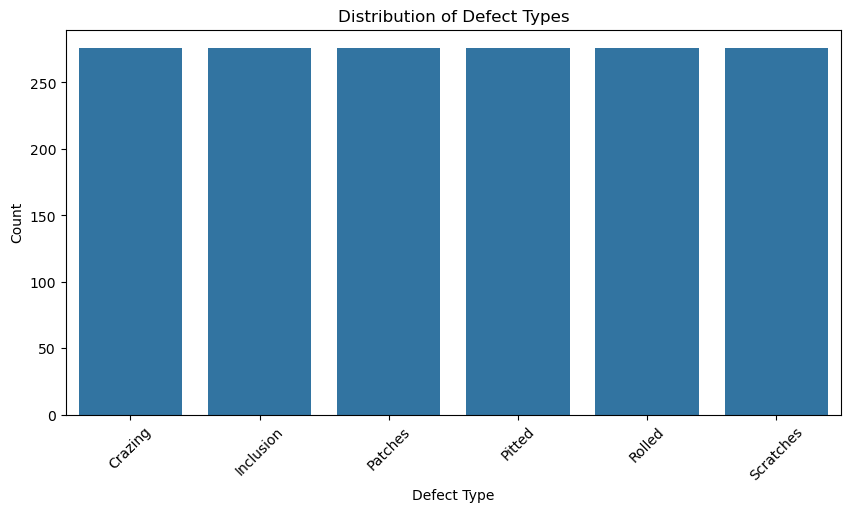

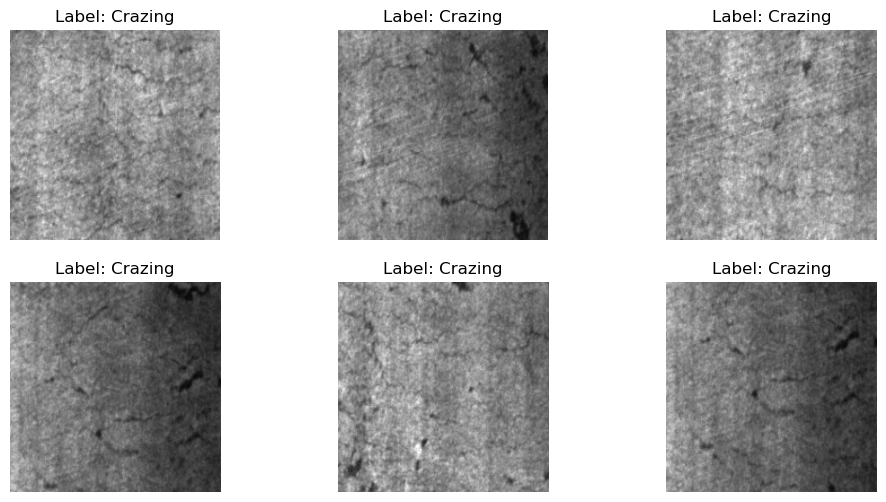

In [6]:
# Check unique defect types and their counts
unique_labels, counts = np.unique(y_labels, return_counts=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=unique_labels, y=counts)
plt.xlabel("Defect Type")
plt.ylabel("Count")
plt.title("Distribution of Defect Types")
plt.xticks(rotation=45)
plt.show()

# Show some sample images with labels
def show_sample_images(X_data, y_labels, label_encoder, num_samples=6):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 3, i+1)
        plt.imshow(X_data[i])
        plt.title(f"Label: {label_encoder.inverse_transform([y_labels_encoded[i]])[0]}")
        plt.axis("off")
    plt.show()

show_sample_images(X_data, y_labels_encoded, label_encoder)


### 4. Train the Model

In [7]:
# Define the CNN model
model = Sequential()

# First convolutional layer with ReLU activation and input shape (224, 224, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output to feed into the fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(Dense(len(np.unique(y_labels_encoded)), activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

C:\Users\milto\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 601ms/step - accuracy: 0.1869 - loss: 5.5139 - val_accuracy: 0.2861 - val_loss: 1.6894
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 595ms/step - accuracy: 0.4202 - loss: 1.4596 - val_accuracy: 0.6175 - val_loss: 1.0824
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 612ms/step - accuracy: 0.6608 - loss: 0.9534 - val_accuracy: 0.7349 - val_loss: 0.7580
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 565ms/step - accuracy: 0.7387 - loss: 0.6623 - val_accuracy: 0.8283 - val_loss: 0.4601
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 585ms/step - accuracy: 0.8366 - loss: 0.4932 - val_accuracy: 0.7500 - val_loss: 0.7260
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 556ms/step - accuracy: 0.8796 - loss: 0.4412 - val_accuracy: 0.6747 - val_loss: 0.7766
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 549ms/step - accuracy: 0.8604 - loss: 0.3872 - val_accuracy: 0.6928 - val_loss: 0.6739
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 554ms/step - accuracy: 0.8859 - loss: 0.3387 - val_accu

### 5. Evaluate the model

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8833 - loss: 0.2605
Test Accuracy: 89.16%
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.82      0.84      0.83        64
           2       0.98      0.97      0.97        58
           3       0.68      0.82      0.74        39
           4       1.00      1.00      1.00        62
           5       0.82      0.67      0.74        49

    accuracy                           0.89       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.90      0.89      0.89       332

Confusion Matrix:
[[59  0  1  0  0  0]
 [ 0 54  0  8  0  2]
 [ 1  0 56  1  0  0]
 [ 0  2  0 32  0  5]
 [ 0  0  0  0 62  0]
 [ 0 10  0  6  0 33]]


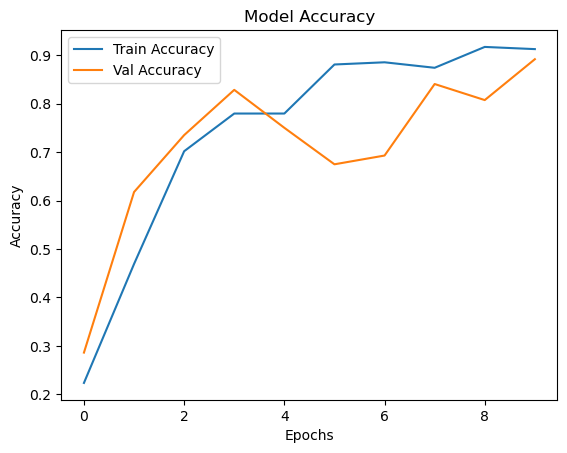

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate predictions
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
